
# **Práctico 3 y 4 (parte 5)**

##**Importación de módulos y librerías**

In [37]:
#Librerías 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from ast import literal_eval
import re

# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Para dividir el dataset en train  y test
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Para tratamiento de texto
from sklearn.feature_extraction.text import CountVectorizer

# Para el cálculo de tf y tf–idf 
from sklearn.feature_extraction.text import TfidfTransformer

# Algoritmo del Árbol de Decisión
from sklearn.tree import (DecisionTreeClassifier, plot_tree)

# Para utilizar Naive-Bayes para la clasificación
from sklearn.naive_bayes import MultinomialNB

# Para utilizar el algoritmo del gradiente descendiente
from sklearn.linear_model import SGDClassifier

# Para calcular métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report) 


In [2]:
#lectura del csv desde colab
from google.colab import files   # para poder leer archivos que están en mi pc
uploaded = files.upload()

Saving curated_data_para_nlp.csv to curated_data_para_nlp.csv


In [ ]:
# LECTURA DESDE JUPYTER NOTEBOOK

#filename = 'curated_data_para_nlp.csv'
#datos_curados = pd.read_csv(os.path.join('..', 'dataset', filename))


## **Carga de datos**

El archivo **curated_data_para_nlp.csv** se genera a partir del archivo yup_messages_preprocessed.csv y datadump-20150801-20171219.csv y se cura para aplicar sobre el mismo técnicas de procesamiento del lenguaje natural.

In [13]:
datos_curados= pd.read_csv('curated_data_para_nlp.csv')
print('Tamaño del dataset: \n')
display(datos_curados.shape)  # simil: len(datos_curados)

Tamaño del dataset: 



(17429, 21)

#### **Limpieza: Unificación de las expresiones algebraicas bajo el tag math**

In [ ]:
#datos_curados['tokens'] = datos_curados.tokens.apply(lambda x: literal_eval(x))

In [4]:
# Los unigramas que contienen al menos un dígito y al menos un operador algebraico se unifican bajo el tag <math> 
# usando una expresión regular

r = re.compile('((?=.*[0-9])(?=.*[%\/\(\)\^\\\+\-\*\=]))^.*')
datos_curados['tokens'] = datos_curados.tokens.apply(lambda x: ['<math>' if r.match(w) else w for w in x])

### **Observo las primeras filas de la columna 'tokens', la cual contiene texto de interés para el análisis.**

In [ ]:
datos_curados['tokens'].head()

0    [<url>, Do, n't, worry, ,, no, minutes, will, ...
1    [Do, n't, worry, ,, no, minutes, will, be, use...
2    [Do, n't, worry, ,, no, minutes, will, be, use...
3    [Do, n't, worry, ,, no, minutes, will, be, use...
4    [Hello, , Jasmyn, , :), Welcome, to, Yup, !, <...
Name: tokens, dtype: object

### **Observo las últimas filas de la columna 'tokens', la cual contiene texto de interés para el análisis.****


In [ ]:
datos_curados['tokens'].tail()

17424    [<url>, Hi, Steven, ,, welcome, to, Yup, 😀, .,...
17425    [<url>, Hi, natalia, ,, welcome, to, Yup, 😀, ....
17426    [<url>, Hi, !, My, name, is, M., Jesus, and, I...
17427    [<url>, Thanks, for, signing, up, MANATEE17, 😀...
17428                                              [<url>]
Name: tokens, dtype: object

### **Selecciono del dataset datos_curados las columnas de interés:**

- tokens: el texto de los diálogos.
- student_rating_cat: columna calculada a partir de la calificación asignada por el alumno a la sesión: '0 - Negativa', '1 - Positiva'

In [14]:
df_x=datos_curados['tokens']
df_y=datos_curados['student_rating_cat'] #datos_curados.student_rating_cat 
print('Longitud de df_x:', len(df_x), ' y Longitud de df_y:', len(df_y))

Longitud de df_x: 17429  y Longitud de df_y: 17429


### **División y normalización de los datos**

1. El conjunto de datos es dividido en datos de entrada o alimentación y en la referencia o target al cual debe apuntar el clasificador al momento de predecir.

1. Se divide nuevamente al conjunto de datos en datos de entrenamiento o train y datos de evaluación o test, cada uno de ellos con su correspondiente referencia o target.

In [15]:
# División entre instancias y etiquetas
X, y = df_x, df_y       #datos_curados['tokens'], datos_curados.student_rating_cat   

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('La Longitud del conj. de datos de train es', len(X_train), 'y la longitud del conj. de datos de test es', len(X_test))

La Longitud del conj. de datos de train es 13943 y la longitud del conj. de datos de test es 3486


## **Bolsa de palabras para clasificación**

### **Vectorizamos el texto con el método CountVectorizer()** 


### Utilizando el método **CountVectorizer** convertimos el texto de **X_train** en vectores numéricos.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# trabajamos con CountVectorizer sin parámetros por defecto
vectorizer = CountVectorizer()
x_traincv= vectorizer.fit_transform(X_train)          #Learn the vocabulary dictionary and return document-term matrix.

# ¿cuál es la dimensión de la matriz dispersa?
print('Dimensión de la matriz dispersa \n.')
x_traincv 

Dimensión de la matriz dispersa 
.


<13943x33560 sparse matrix of type '<class 'numpy.int64'>'
	with 2422063 stored elements in Compressed Sparse Row format>

### **Valores de la matriz dispersa**




In [17]:
# imprimimos lo valores de la matriz dispersa
print(x_traincv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### **Valores de los features**

In [18]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '000000000',
 '0000000000000000000000004',
 '0000000000000000000004',
 '00000000001',
 '000000000035',
 '0000000001',
 '0000000002546',
 '000000000667',
 '000000001',
 '00000000227',
 '00000001',
 '000000010',
 '00000004290224',
 '0000001',
 '000000227',
 '000000333',
 '000000433926',
 '000000434',
 '000000625',
 '0000006708',
 '000001',
 '00000149253',
 '00000980',
 '00001',
 '000033',
 '000034',
 '00004',
 '0000453864',
 '00005',
 '00006',
 '000064',
 '00007',
 '00008428903',
 '00009118',
 '0000939435',
 '0001',
 '0001089',
 '00012097',
 '000127727272727',
 '00012820512',
 '00013',
 '000146',
 '000146153846154',
 '0001464',
 '00014653846154',
 '00016574585',
 '00019230769',
 '0002',
 '0003',
 '0003x',
 '00040',
 '000428',
 '000465',
 '0004780',
 '0005',
 '00050',
 '000567',
 '0006',
 '00063',
 '000678',
 '0006780',
 '000678km',
 '00072',
 '0008',
 '000864',
 '0008m',
 '0008r',
 '0009',
 '00092',
 '000925',
 '00097656',
 '0009x',
 '000k',
 '000ml',


### Utilizando el método **CountVectorizer** convertiremos el texto de **X_test** en vectores numéricos.




In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# trabajamos con CountVectorizer sin parámetros por defecto
vectorizer2 = CountVectorizer()
x_testcv= vectorizer2.fit_transform(X_test)          #Learn the vocabulary dictionary and return document-term matrix.

# ¿cuál es la dimensión de la matriz dispersa?
print('Dimensión de la matriz dispersa \n.')
x_testcv 

Dimensión de la matriz dispersa 
.


<3486x15520 sparse matrix of type '<class 'numpy.int64'>'
	with 603421 stored elements in Compressed Sparse Row format>

### **Valores de la matriz dispersa**

In [20]:
# imprimimos lo valores de la matriz dispersa
print(x_testcv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **Valores de los features**

In [21]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '000000000',
 '0000000000000000000000004',
 '0000000000000000000004',
 '00000000001',
 '000000000035',
 '0000000001',
 '0000000002546',
 '000000000667',
 '000000001',
 '00000000227',
 '00000001',
 '000000010',
 '00000004290224',
 '0000001',
 '000000227',
 '000000333',
 '000000433926',
 '000000434',
 '000000625',
 '0000006708',
 '000001',
 '00000149253',
 '00000980',
 '00001',
 '000033',
 '000034',
 '00004',
 '0000453864',
 '00005',
 '00006',
 '000064',
 '00007',
 '00008428903',
 '00009118',
 '0000939435',
 '0001',
 '0001089',
 '00012097',
 '000127727272727',
 '00012820512',
 '00013',
 '000146',
 '000146153846154',
 '0001464',
 '00014653846154',
 '00016574585',
 '00019230769',
 '0002',
 '0003',
 '0003x',
 '00040',
 '000428',
 '000465',
 '0004780',
 '0005',
 '00050',
 '000567',
 '0006',
 '00063',
 '000678',
 '0006780',
 '000678km',
 '00072',
 '0008',
 '000864',
 '0008m',
 '0008r',
 '0009',
 '00092',
 '000925',
 '00097656',
 '0009x',
 '000k',
 '000ml',


### **Otra opción es utilizar HashingVectorizer**

Una opción a la utilización de CountVectorizer es utilizar el método 'HashingVectorizer' ya que utiliza menos menoria y es escalable a grandes conjuntos de datos. Usa un truco de hash para encontrar el nombre de la cadena del token para presentar la asignación de índices. Esto significa que usa muy poca memoria y escala a grandes conjuntos de datos, ya que no necesita almacenar todo el vocabulario y es más rápido de seleccionar y ajustar, ya que no hay ningún estado. Sin embargo, no hay transformación inversa (de vector a texto), puede haber colisiones y no hay ponderación de frecuencia de documento inversa.

 Referencia: https://learning.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html#ATAP04

###**Vectorizamos el texto con el método HashingVectorizer()**

### Utilizando el método HashingVectorizer() convertiremos el texto de X_train en vectores numéricos.

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer3 = HashingVectorizer(n_features=2**4)
x_trainhv = vectorizer3.fit_transform(X_train)
print('Dimensión de la matriz dispersa \n.')
print(x_trainhv.shape)

Dimensión de la matriz dispersa 
.
(13943, 16)


### Utilizando el método HashingVectorizer() convertiremos el texto de X_test en vectores numéricos.

In [23]:
vectorizer3 = HashingVectorizer(n_features=2**4)
x_testhv = vectorizer3.fit_transform(X_test)
print('Dimensión de la matriz dispersa \n.')
print(x_testhv.shape)

Dimensión de la matriz dispersa 
.
(3486, 16)


#**Clasificadores**

## **Árboles de Decisión**
Se crea el objeto del modelo y se imprimen los parametros por defecto que posee el modelo. Se fija la semilla para hacer reproducible el experimento.

### Arboles de decisión con countVectorizer()

In [24]:
arbol_decision = DecisionTreeClassifier(random_state = 42) # para que coincida con el random_state elegido para SGD

print('Parámetros utilizados: \n', np.array(list(arbol_decision.get_params(deep=False).items())))

Parámetros utilizados: 
 [['ccp_alpha' 0.0]
 ['class_weight' None]
 ['criterion' 'gini']
 ['max_depth' None]
 ['max_features' None]
 ['max_leaf_nodes' None]
 ['min_impurity_decrease' 0.0]
 ['min_impurity_split' None]
 ['min_samples_leaf' 1]
 ['min_samples_split' 2]
 ['min_weight_fraction_leaf' 0.0]
 ['presort' 'deprecated']
 ['random_state' 42]
 ['splitter' 'best']]


### **Entrenamiento**

El modelo es entrenado con los parámetros que posee la implementación por defecto, dicho proceso consume el conjunto de datos de entrenamiento y su correspondiente referencia.

In [25]:
arbol_decision.fit(x_traincv, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### **Predicción con el conjuto de datos de entrenamiento y test**


Se lleva a cabo el proceso de predicción tomando como entrada al modelo

- El conjunto de datos de entrenamiento
- El conjunto de datos de test

In [26]:
#1. Predicción con el conjunto de datos de entrenamiento
y_train_pred_arbolD= arbol_decision.predict(x_traincv)
y_train_pred_arbolDp = arbol_decision.predict_proba(x_traincv)

In [27]:
#1. Predicción con el conjunto de datos de test
y_test_pred_arbolDcv  = arbol_decision.predict(x_testcv)
y_test_pred_arbolDpCv = arbol_decision.predict_proba(x_testcv)

ValueError: ignored

### **Verificamos la accuracy obtenida.**

### Accuracy con train

In [28]:
print ('Accuracy: %d ' % ((np.sum(y_train == y_train_pred_arbolD))/float(y_train.size)*100))

Accuracy: 99 


### Accuracy con test

In [ ]:
print ('Accuracy: %d ' % ((np.sum(y_test == y_test_pred_arbolD))/float(y_test.size)*100))

In [ ]:
print('Profundidad máxima del árbol:', arbol_decision.get_depth())
print('Cantidad máxima de hojas:', arbol_decision.get_n_leaves())

Profundidad máxima del árbol: 72
Cantidad máxima de hojas: 1415


In [ ]:
# Print the classification report
print(metrics.classification_report(y_test, y_test_pred_arbolDcv))

### **Arboles de decisión con HashingVectorizer**

In [31]:
arbol_decision2 = DecisionTreeClassifier(random_state = 42) # para que coincida con el random_state elegido para SGD

print('Parámetros utilizados: \n', np.array(list(arbol_decision.get_params(deep=False).items())))

Parámetros utilizados: 
 [['ccp_alpha' 0.0]
 ['class_weight' None]
 ['criterion' 'gini']
 ['max_depth' None]
 ['max_features' None]
 ['max_leaf_nodes' None]
 ['min_impurity_decrease' 0.0]
 ['min_impurity_split' None]
 ['min_samples_leaf' 1]
 ['min_samples_split' 2]
 ['min_weight_fraction_leaf' 0.0]
 ['presort' 'deprecated']
 ['random_state' 42]
 ['splitter' 'best']]


In [32]:
arbol_decision2.fit(x_trainhv, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [33]:
#1. Predicción con el conjunto de datos de entrenamiento
y_train_pred_arbolDHv = arbol_decision.predict(x_trainhv)
y_train_pred_arbolpHv = arbol_decision.predict_proba(x_trainhv)

#1. Predicción con el conjunto de datos de test
y_test_pred_arbolDHv  = arbol_decision.predict(x_testhv)
y_test_pred_arbolDpHv = arbol_decision.predict_proba(x_testhv)

ValueError: ignored

In [ ]:
#Accuracy con train

print ('Accuracy con train: %d ' % ((np.sum(y_train == y_train_pred_arbolDHv))/float(y_train.size)*100))

In [ ]:
#Accuracy con test
print ('Accuracy con test: %d ' % ((np.sum(y_test == y_test_pred_arbolDHv))/float(y_test.size)*100))

Accuracy con test: 70 


In [35]:
print('Profundidad máxima del árbol:', arbol_decision.get_depth())
print('Cantidad máxima de hojas:', arbol_decision.get_n_leaves())

Profundidad máxima del árbol: 72
Cantidad máxima de hojas: 1415


In [36]:
# Print the classification report
print(metrics.classification_report(y_test, y_test_pred_arbolDHv))

NameError: ignored

In [ ]:
# definimos los parámetros
param_grid = {
  'analyzer': ['word'],
  'e': np.arange(1,4),
  'max_df': [0.0, 1.0],    #cuando trabajamos con flotante nos referimos a la proporción máxima de aparición/frecuencia de un determinado término 
  'min_df':[0.0, 1.0]}


EXTRAS

### **Naive-Bayes con CountVectorizer**
Baseline con Naive-Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
y_train=y_train.astype('int')
model.fit(x_traincv, y_train)

#clf = MultinomialNB().fit(X_train_tfidf, datos_curados.student_rating_cat)

MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6], fit_prior=True)

In [ ]:
predicted =model.predict(x_testcv)

##**Análisis del comportamiento de CountVectorizer y**

### Con el objetivo de visualizar lo que hace CountVectorizer exploraremos sus hiperparámetros **min_df, max_df** y **ngram-range.**

Es decir, si min_df es 0.005, todas las palabras que representen menos de un 0,5% de las palabras totales serán descartadas. Por el otro lado, si max_df es 0.35, todas las palabras que representen más de un 35% del total de palabras serán descartadas. Visualizar las palabras que serían descartadas dentro de este rango y describir cómo son.

In [40]:
# palabras que representen menos de un 0,5% de las palabras totales
vectorizer_min = CountVectorizer(min_df= 0.0, max_df= 0.005, ngram_range= (1,1))
X_4 = vectorizer_min.fit_transform(datos_curados['tokens'])  #Learn the vocabulary dictionary and return document-term matrix.
# ¿cuál es la dimensión de la matriz dispersa?
print('Dimensión de la matriz dispersa \n.')
X_4  #o X.shape

Dimensión de la matriz dispersa 
.


<17429x35766 sparse matrix of type '<class 'numpy.int64'>'
	with 175718 stored elements in Compressed Sparse Row format>

**Gráfico**

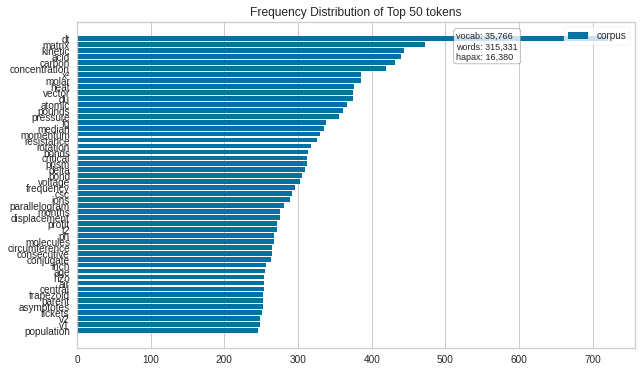

In [42]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(10,6))
features = vectorizer_min.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(X_4)
visualizer.poof()

### **Bolsa de palabras resultantes**

In [44]:
# palabras que representen más de un 35% del total de palabras
vectorizer_max = CountVectorizer(min_df= 0.35)
#vectorizer = CountVectorizer(min_df= 0.005, max_df= 0.35)
X_5 = vectorizer_max.fit_transform(datos_curados['tokens'])   #Learn the vocabulary dictionary and return document-term matrix.
# ¿cuál es la dimensión de la matriz dispersa?
print('Dimensión de la matriz dispersa \n.')
X_5 #o X.shape

Dimensión de la matriz dispersa 
.


<17429x128 sparse matrix of type '<class 'numpy.int64'>'
	with 1408383 stored elements in Compressed Sparse Row format>

### **Bolsa de palabras resultantes**

In [ ]:
vectorizer_max.get_features_names()

**Gráfico**

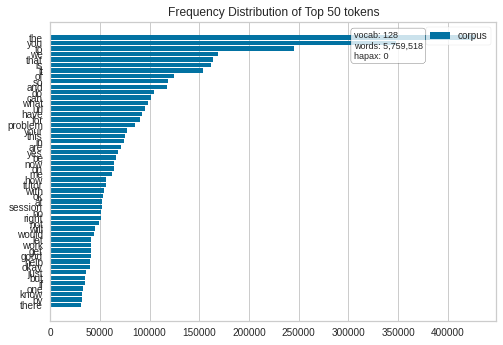

In [46]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
features = vectorizer_max.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(X_5)
visualizer.poof()

### **Cálculo de tf y tf–idf para unigramas**

El **tf** es la frecuencia de términos en un documento y el **idf** es la frecuencia inversa de un término en el conjunto de documentos. Antes de calcula dicha frecuencia, necesito vectorizar. 

**Aplico countVectorizer con unigramas**

Por defecto, trabaja con unigramas por lo tanto, no es necesario especificar el parámetro: ngram_range=(1, 1). 

In [47]:
unigrama_vectorizer = CountVectorizer(min_df=1)  #dejamos de lado las palabras de frecuencia 1
X_1 = unigrama_vectorizer.fit_transform(datos_curados['tokens'])
# ¿cuál es la dimensión de la matriz dispersa?
print('Dimensión de la matriz dispersa \n.')
X_1  #o X.shape

Dimensión de la matriz dispersa 
.


<17429x37727 sparse matrix of type '<class 'numpy.int64'>'
	with 3025484 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_1)
#print('Tamaño de la matriz',X_tfidf.shape)
print("Longitud del vector:", len(X_tfidf.toarray()[0]))


Longitud del vector: 37727


In [49]:
 print(len(X_tfidf.toarray()[0]))

37727


In [50]:
print('Valores de la matriz con el cálculo de tf-idf \n')
print(X_tfidf.toarray())

Valores de la matriz con el cálculo de tf-idf 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.13823712 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Aplico countVectorizer con bigramas**

En este caso, es necesario especificar el parámetro ngram_range=(2, 2).

In [51]:
bigrama_vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=1)  # dejamos de lado las palabras de frecuencia 1
X_2 = bigrama_vectorizer.fit_transform(datos_curados['tokens'])
# ¿cuál es la dimensión de la matriz dispersa?
print('Dimensión de la matriz dispersa \n.')
X_2  #o X.shape


Dimensión de la matriz dispersa 
.


<17429x661257 sparse matrix of type '<class 'numpy.int64'>'
	with 6851280 stored elements in Compressed Sparse Row format>

In [ ]:
print(bigrama_vectorizer.get_feature_names())    #Array mapping from feature integer indices to feature name.
print('Valores del vector')
print(X_2.toarray())

###**Cálculo de tf y tf–idf para bigramas**

In [ ]:
tfidf_transformer = TfidfTransformer()
X_2_tfidf = tfidf_transformer.fit_transform(X_2)
print('Tamaño de la matriz',X_2_tfidf.shape)
.shape

print("Longitud del vector:", len(X_2_tfidf.toarray()[0]))


In [ ]:
print('Valores de la matriz con el cálculo de tf-idf \n')
print(X_2_tfidf.toarray())

### **Referencias**

[Método CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)

[Método TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)



[Método TfidfTransformer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer)

[Repo sobre Applied Text Analysis with Python](https://github.com/foxbook/atap
)

Vectorización:

https://learning.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html#ATAP04

https://learning.oreilly.com/library/view/applied-text-analysis/9781491963036/
 https://github.com/foxbook/atap/blob/master/snippets/ch04/vectorization.py

[Ejemplo de aplicación de CountVectorizer()](https://github.com/shreyans29/thesemicolon/blob/master/Text%20Analytics%20CV.ipynb)




